# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations
- You are expected to detail your decisions & thinking in comments
- You may use any language you like (although the examples given below are using Python)
- avoid using too many libraries that would do too much of the work for you.
- You can use code below to generate the trainig data of 10 colours:

### 0. Eliiza coding challenge submission for Software Engineer (Machine Learning)
by
#### Surya Avala
#### suryaavinashavala@gmail.com

In [65]:
# Generate Data
import numpy as np
input_data = np.random.random((10,3))
input_data

array([[5.49710904e-01, 1.09412452e-01, 9.57530405e-01],
       [9.00595561e-01, 9.31075958e-01, 6.38485641e-01],
       [7.40400934e-01, 5.07533976e-01, 7.65573495e-01],
       [1.04635636e-01, 6.01949186e-01, 8.83991868e-01],
       [6.18712450e-04, 9.99766543e-01, 3.80970508e-01],
       [9.14488815e-01, 1.32063134e-01, 5.00177127e-01],
       [8.85873426e-01, 5.62949556e-01, 1.70355201e-01],
       [4.39052195e-01, 1.13876056e-01, 4.95117749e-01],
       [1.96680516e-01, 2.22209349e-01, 4.24271677e-01],
       [4.38863795e-01, 8.21110662e-02, 7.87941904e-01]])

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [66]:
# Implement the network...
# Comments generated using Auto-docstring extension in VSCode - https://marketplace.visualstudio.com/items?itemName=njpwerner.autodocstring
# Only used numpy for the network - but using sklearn min max scaling later in the notebook to convert weights to pixels 0-255

class SOM:

    def __init__(self, Size_X, Size_Y, dim_of_input_vec):
        """SOM Init
        0. One overarching theme across the code is to use as much of numpy's internal fucntionality as possible (strictly avoiding falling back to python loops), because numpy is in general more optimised for array manipulations compared to python's list.
        1. SOM Network is essentially a 3D array of Weights (self.network), where
            1.1 Axis 0,1 are position of the Node/Neuron
            1.2 Axis 2 is Weights for that particular Node/Neuron
        2.  self.network_dimensions is just the Shape of the network - redundant as a variable but still used for convinience and cleanliness in the code
        3. self.network_map is a grid of positions of the neurons(it is not dependant on dimensions of the input vector so a 3x3x100 network has the same network map as 3x3x1000m by my definition of network map). Example: 2X2 network's will be array([[[0, 0],
        [0, 1]],[[1, 0],[1, 1]]])
            3.1 Primary reason to use network_map is to efficiently calculate weight update matrix and updates weights of the network in bulk
            3.2 network_map is used at every iteration of the training (during weight updates), so it is initialised with the network itself inorder to save computational resources at every step.
        4. self.sigma_0 and self.alpha_0 are neighbourhood radius and learning rate at iteration 0 respectively.
            4.1 These are some of the hyperparamaters (ontop the network architecture) that we would potentially tune to get better results. So they are initialised/stored with the network and can easily be modified in the init without having to dig through the code.  

        Arguments:
            Size_X {int} -- Width of the Network
            Size_Y {int} -- Height of the Network
            dim_of_input_vec {int} -- Number of Dimensions in a training instance/input vector aka features 
        """
        self.network_dimensions = (Size_X, Size_Y, dim_of_input_vec)
        self.network = np.random.random(self.network_dimensions)
        # There are few ways to initiliase the network_map and according to this answer on stackoverflow (verified by my experimentation) transposing np incides is the fastest.
        # Works https://stackoverflow.com/questions/44230312/fastest-way-to-create-numpy-2d-array-of-indices/44230705#44230705
        self.network_map = np.indices(
            (self.network_dimensions[0], self.network_dimensions[1])).transpose(1, 2, 0)
        self.sigma_0 = max(self.network_dimensions[:2])/2
        self.alpha_0 = 0.1
        return

    def _find_bmu(self, current_input_vector):
        """Finds the position of the Best Matching Unit (neuron/node) for the current_input_vector (training instance)

        0. Instead of looping over all the neurons one by one with python loops, i've taken advantage of numpy's optimisation on array calculations - a quick runtime analysis over increasing network sizes shows that this approach is approx 100x faster than looping.  
        1. Eclidean Distance - np.sqrt(np.sum((current_input_vector-self.network)**2, axis=2)) (axis 2 is the weights) - Distances are calculated from current_input_vector to the vector of Weights at every neuron
            1.1 Size_X x Size_Y array is returned
            1.2 Value at each position represent the distance between the weight vector of the neuron at that position to the current input vector
        2. Shorted Distance - np.argmin - Position of Smallest among all the distances calculated
            2.1 argmin picks the position of shortest/smallest distance from that array at 1.1 (flatenned)
        3. Position of closest neuron (to input vector) in 2D space - np.unravel_index
            3.1 np.unravel_index gives an equivalent position of 2.1 in 2D space of dimensions (self.network_dimensions[0], self.network_dimensions[1])


        Arguments:
            current_input_vector {np.array} -- Input vector on which Network is currently being trained 

        Returns:
            bmu_index [np.array] -- 2D position/index of the Best Matching Unit of current input vector
        """
        return np.unravel_index(np.argmin(np.sqrt(np.sum((current_input_vector-self.network)**2, axis=2))), (self.network_dimensions[0], self.network_dimensions[1]))

    def _calc_neighbourhood_radius(self, current_iter_number, max_iterations):
        """Calculates the neighbourhood radius sigma_t for the current training iteration - according to the formula given

        Arguments:
            current_iter_number {int} -- Current iternation number out of the total iterations (max_iterations)
            max_iterations {int} -- Total number of iterations in training - user specified

        Returns:
            sigma_t or neighbourhood radius {float} -- radius around the closest neuron's position - this is later used to update the weights in the network as part of the training.
        """
        lamDa = max_iterations/np.log(self.sigma_0)
        return self.sigma_0*np.exp(-current_iter_number/lamDa)

    def _calc_learning_rate(self, current_iter_number, max_iterations):
        """Calculates the learning rate alpha_t by which the weights would be updates

        Arguments:
            current_iter_number {int} -- Current iternation number out of the total iterations (max_iterations)
            max_iterations {int} -- Total number of iterations in training - user specified

        Returns:
            alpha_t or neighbourhood radius {float} -- learning rate by which weights are updated after the training step.
        """
        lamDa = max_iterations/np.log(self.sigma_0)
        return self.alpha_0*np.exp(-current_iter_number/lamDa)

    def _alpha_influence_matrix(self, bmu_index, current_iter_number, max_iterations):
        """Calculates 𝛼𝑡𝜃𝑡 component for the entire network as a matrix

        NOTE : d_i has a square root while calculating distances from bmu and d_i is squared in the calculating theta_t (which nullyfies the square root operation). So both square root and squaring d_i are optimited to save computational resources.

        Arguments:
            bmu_index [np.array] -- 2D position/index of the Best Matching Unit of current input vector
            current_iter_number {int} -- Current iternation number out of the total iterations (max_iterations)
            max_iterations {int} -- Total number of iterations in training - user specified

        Returns:
             𝛼𝑡𝜃𝑡 [np.array] -- alpha_t*theta_t for the network grid
        """
        sigma_t_square = self._calc_neighbourhood_radius(
            current_iter_number, max_iterations)**2
        alpha_t = self._calc_learning_rate(current_iter_number, max_iterations)
        return alpha_t*np.exp(np.sum((self.network_map-bmu_index)
                                     ** 2, axis=2)*(-1/(2*sigma_t_square)))

    def _mass_weight_update(self, alpha_influence_matrix, current_input_vector):
        """Updates the weights of network according to the given formula

        1. alpha_influence_matrix is of Size_X x Size_Y dimensions
        2. self.network is of Size_X x Size_Y x dim_of_input_vec dimensions - sdirectly multiplying them gives erroneous results (even with numpy's broadcasting)
        3. Essenstially at every 2D position (x,y) we want to take the alpha*theta component from alpha_influence_matrix and multiply all the weights at that position (x,y) in the network (subtracted from current input vector)
            3.1 np.einsum does exactly that, it defines/acknowledges that alpha_influence matrix is of 'ij' deimensions and current_input_vector-self.network is of 'ijk' --> and we want to multiply ij from alpha_influence_matrix across the 'k' in the latter component
        Arguments:
            alpha_influence_matrix [np.array] -- alpha_t*theta_t for the network grid
            current_input_vector {np.array} -- Input vector on which Network is currently being trained
        """
        # einsum is pure GOLD!!!!
        self.network = self.network + \
            np.einsum('ij,ijk->ijk', alpha_influence_matrix,
                      current_input_vector-self.network)

    def train(self, input_data, max_iterations):
        """Actual training of the network aka weight updates based of the training inputs seen

        Looks at training data sequentially from the beginning index 0 and keeps looping over again and again as long the max_iterations are not reached. So if max_iterations > len(input_data) network will see the same examples again. 
        1. Finds bmu position for the current input vector
        2. Calculates alpah_influence_matrix 
        3. Updates weights in the network based on learning rate and neighbourhood distance

        Arguments:
            input_data {np.array} -- Training data is a list of (1,f) array where f is the number of features/dimensions in a training example
            max_iterations {int} -- Total number of iterations in training - user specified

        Returns:
            None - returns none - but updates weights during training
        """
        nb_training_instances = len(input_data)
        for current_iter_number in range(1, max_iterations+1):
            current_input_vector = input_data[(current_iter_number-1) %
                                              nb_training_instances]
            current_bmu_index = self._find_bmu(current_input_vector)
            current_alpha_influence_matrix = self._alpha_influence_matrix(
                current_bmu_index, current_iter_number, max_iterations)
            self._mass_weight_update(
                current_alpha_influence_matrix, current_input_vector)

#### Translate the weights of each node in the map to pixel data

In [67]:
from sklearn.preprocessing import minmax_scale

def weights_to_pixels(net):
    return minmax_scale(net.network.ravel(), feature_range=(0,255)).reshape(net.network.shape).astype(int)

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

You should end up with something that looks like below after 500 iterations:

#### Training data is a random set of 20 colours

In [68]:
# Training data is a random set of 20 colours
image_data = np.random.random((20,3))

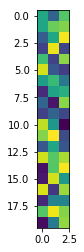

In [69]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

In [70]:
#10x10 network init
network_10_10_100 = SOM(10,10,3)

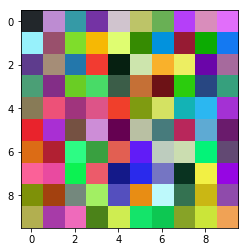

In [71]:
#Network weights at init
plt.imshow(network_10_10_100.network)

In [72]:
#Training 
network_10_10_100.train(image_data,100)

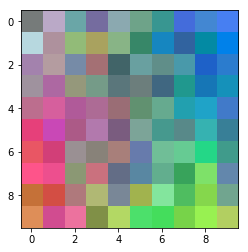

In [73]:
#Training map in pixels
plt.imshow(weights_to_pixels(network_10_10_100))

#### How long does this take?

In [74]:
#Training time
%timeit network_10_10_100.train(image_data,100)

4.36 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### What does this look like if you perform 200 & 500 iterations?

In [75]:
#Train 200 iter
network_10_10_100.train(image_data, 200)

#### What does the map look like?

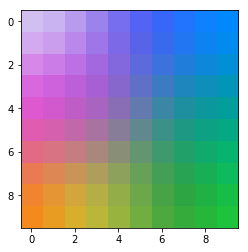

In [76]:
plt.imshow(weights_to_pixels(network_10_10_100))

In [77]:
# Train 500 iter
network_10_10_100.train(image_data, 500)

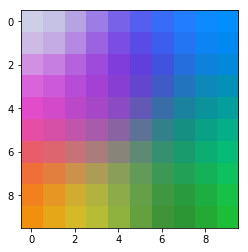

In [78]:
plt.imshow(weights_to_pixels(network_10_10_100))

In [79]:
# Train 500 iter
network_10_10_100.train(image_data, 1000)

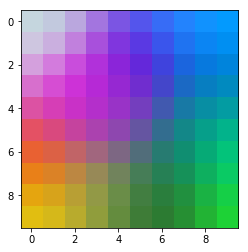

In [80]:
plt.imshow(weights_to_pixels(network_10_10_100))

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

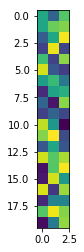

In [81]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

In [82]:
#init 
network_100_100 = SOM(100,100,3)

In [83]:
#Training for 1000 iter
network_100_100.train(image_data, 1000)

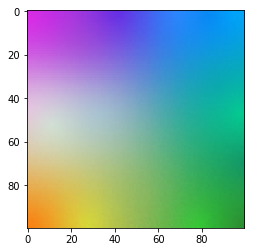

In [84]:
plt.imshow(weights_to_pixels(network_100_100))

In [85]:
# Time taken for training
%timeit network_100_100.train(image_data, 1000)

473 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [86]:
# code profiling
%prun network_100_100.train(image_data, 1000)

Ordered by: internal time

  | ncalls | tottime | percall | cumtime | percall | filename:lineno(function)|
  |--- | --- | --- | --- | --- | --- |
    | 1000  |  0.097  |  0.000 |   0.123 |   0.000 | <ipython-input-43-deef75659a5c>:83(_alpha_influence_matrix) |
    | 1000  |  0.083  |  0.000  |  0.210  |  0.000 | <ipython-input-43-deef75659a5c>:36(_find_bmu) |
    | 1000  |  0.076   | 0.000  |  0.148  |  0.000 | <ipython-input-43-deef75659a5c>:102(_mass_weight_update) |
    | 1000  |  0.070   | 0.000  |  0.070  |  0.000 | {built-in method numpy.core._multiarray_umath.c_einsum} |
     
High level profiling shows that the most time is taken during the matrix operations. These operations could massively be parallelised using a GPU. As shown in this report, it makes quite big difference in run times.
https://3fee7a1sld751eqrjr3a035t-wpengine.netdna-ssl.com/wp-content/uploads/2015/08/Ultra-Fast-SOM-using-CUDA.pdf
http://software.quest-global.com/wp-content/uploads/2014/11/Ultra_Fast_SOM_using_CUDA.pdf

As pointed out by a few research papers, the bmu search doesn't have to be absolute (we could just search a smaller sample space) and still acheive decent results by daramatically reducing the training times
https://search.ieice.org/bin/summary.php?id=e87-c_11_1787
https://digital-library.theiet.org/content/conferences/10.1049/cp_19991233